In [713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf,pacf
from datetime import datetime

In [736]:
rice_export = pd.read_csv('RiceExport.csv')
rice_export.index = pd.date_range(start='2015-1',end='2021-10',freq='M')
print(rice_export.head())
print(rice_export.tail())

             Quantity
2015-01-31  608503608
2015-02-28  732151200
2015-03-31  785891643
2015-04-30  700010950
2015-05-31  945597070
             Quantity
2021-05-31  319279915
2021-06-30  389335040
2021-07-31  419580147
2021-08-31  591716954
2021-09-30  638405299


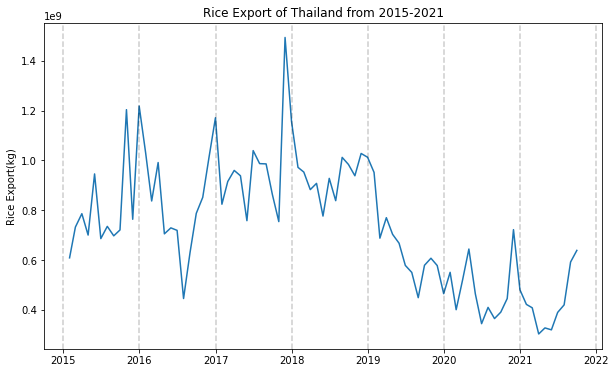

In [715]:
start_date = datetime(2015,1,1)
end_date = datetime(2021,10,1)
plt.figure(figsize=(10,6))
plt.plot(rice_export)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.title('Rice Export of Thailand from 2015-2021')
plt.ylabel('Rice Export(kg)')
plt.show()

# Consider time 2015-2019
    - train: 2015/1 - 2019/6
    - test : 2019/6 - 2019/12

In [716]:
lim_rice_export = rice_export.truncate(before='2015',after='2019')
print(lim_rice_export.head())
print(lim_rice_export.tail())

             Quantity
2015-01-31  608503608
2015-02-28  732151200
2015-03-31  785891643
2015-04-30  700010950
2015-05-31  945597070
              Quantity
2018-08-31  1012065773
2018-09-30   983838331
2018-10-31   938225604
2018-11-30  1027814067
2018-12-31  1012554536


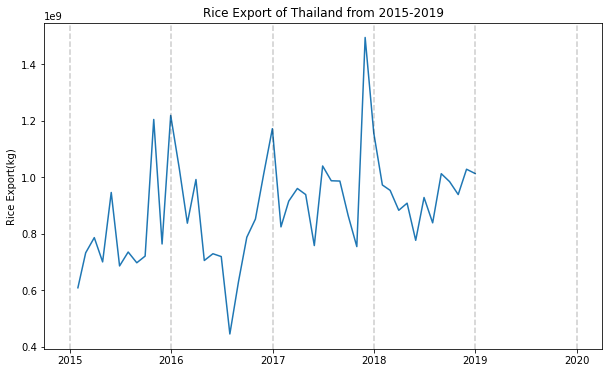

In [717]:
start_date = datetime(2015,1,1)
end_date = datetime(2019,10,1)
plt.figure(figsize=(10,6))
plt.plot(lim_rice_export)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.title('Rice Export of Thailand from 2015-2019')
plt.ylabel('Rice Export(kg)')
plt.show()

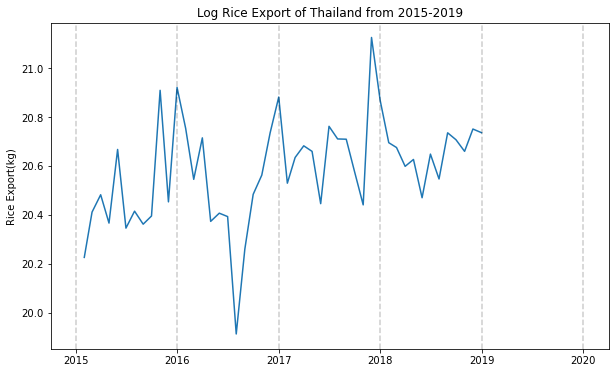

In [718]:
log_lim_rice_export = np.log(lim_rice_export)
start_date = datetime(2015,1,1)
end_date = datetime(2019,10,1)
plt.figure(figsize=(10,6))
plt.plot(log_lim_rice_export)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.title('Log Rice Export of Thailand from 2015-2019')
plt.ylabel('Rice Export(kg)')
plt.show()

In [719]:
firstDiff_log_lim_rice_export = log_lim_rice_export.diff(periods=1).values
seasonal_log_lim_rice_export = log_lim_rice_export.diff(periods=12).values
log_lim_rice_export['first_diff'] = firstDiff_log_lim_rice_export
log_lim_rice_export['Seasonal12'] = seasonal_log_lim_rice_export

In [720]:
print(log_lim_rice_export.head())
print(log_lim_rice_export.tail())

             Quantity  first_diff  Seasonal12
2015-01-31  20.226513         NaN         NaN
2015-02-28  20.411498    0.184984         NaN
2015-03-31  20.482329    0.070832         NaN
2015-04-30  20.366607   -0.115723         NaN
2015-05-31  20.667327    0.300721         NaN
             Quantity  first_diff  Seasonal12
2018-08-31  20.735259    0.188511    0.026151
2018-09-30  20.706972   -0.028287    0.130644
2018-10-31  20.659501   -0.047471    0.218475
2018-11-30  20.750700    0.091199   -0.373905
2018-12-31  20.735742   -0.014958   -0.132679


# ARIMA-first diff (1d)

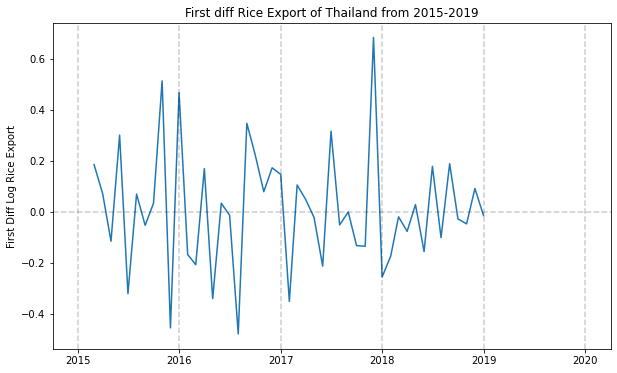

In [721]:
# first diff
start_date = datetime(2015,1,1)
end_date = datetime(2019,10,1)
plt.figure(figsize=(10,6))
plt.plot(log_lim_rice_export['first_diff'] )
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.axhline(0,color='k',linestyle='--',alpha=0.2)
plt.title('First diff Rice Export of Thailand from 2015-2019')
plt.ylabel('First Diff Log Rice Export')
plt.show()

# SARIMA- seasonal diff

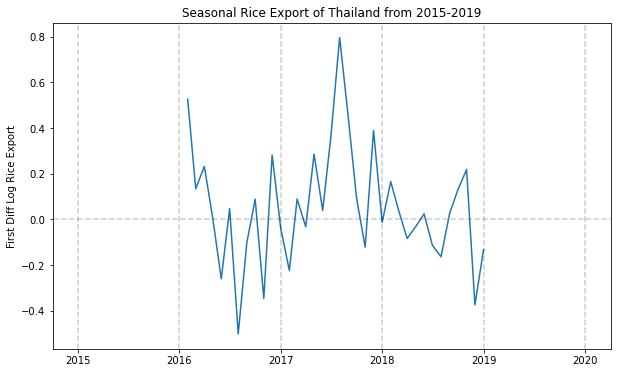

In [722]:
# first diff
start_date = datetime(2015,1,1)
end_date = datetime(2019,10,1)
plt.figure(figsize=(10,6))
plt.plot(log_lim_rice_export['Seasonal12'] )
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.axhline(0,color='k',linestyle='--',alpha=0.2)
plt.title('Seasonal Rice Export of Thailand from 2015-2019')
plt.ylabel('First Diff Log Rice Export')
plt.show()

## Stationary?

In [723]:
from statsmodels.tsa.stattools import adfuller
# H0 : it is not stationary
# Ha : it is a staionary
def adfuller_test(ts):
    result = adfuller(ts)
    labels = ['ADF test Statistics','p-value','#Lags used', 'Number of Observation Used']
    for value,label in zip(result,labels):
        print(label,':',value)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('weak evidence against the null hypothesis, fail to reject H0. time series has a unit root, indicating it is not stationary')

In [724]:
print(adfuller_test(log_lim_rice_export['first_diff'][1:]))
print('---')
print(adfuller_test(log_lim_rice_export['Seasonal12'][13:]))

ADF test Statistics : -7.108106035791787
p-value : 4.0043608818532235e-10
#Lags used : 1
Number of Observation Used : 45
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
None
---
ADF test Statistics : -4.4489096871212555
p-value : 0.00024294384539374166
#Lags used : 0
Number of Observation Used : 34
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
None


### by taking 1 diff, our time series is now stationary

### ACF and PACF

<BarContainer object of 20 artists>

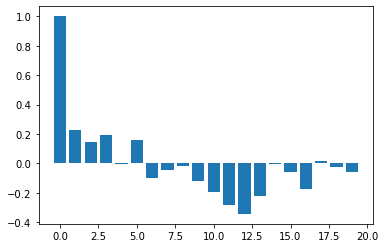

In [725]:
acf_vals= acf(log_lim_rice_export['Seasonal12'][13:])
num_lags = 20
plt.bar(range(num_lags),acf_vals[:num_lags])

<BarContainer object of 15 artists>

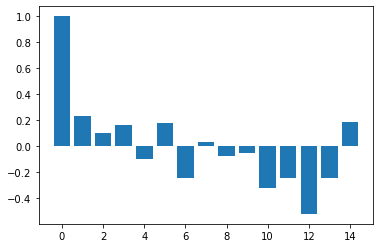

In [726]:
pacf_vals = pacf(log_lim_rice_export['Seasonal12'][13:],nlags=15)
num_lags = 15
plt.bar(range(num_lags),pacf_vals[:num_lags])

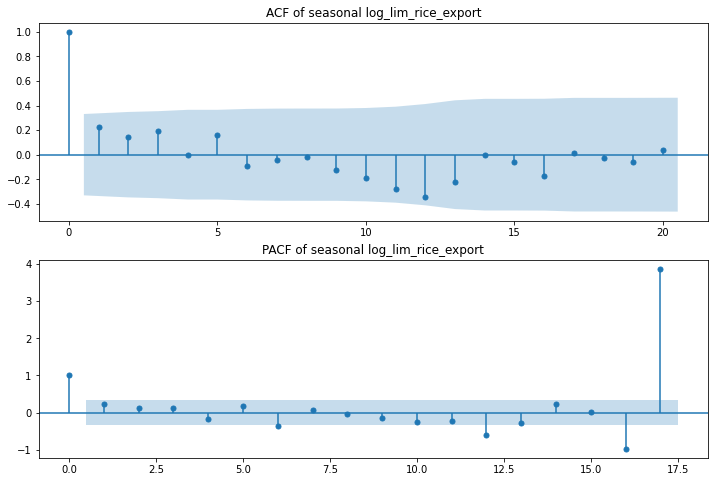

In [727]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(log_lim_rice_export['Seasonal12'][13:],ax=ax1,lags=20,title='ACF of seasonal log_lim_rice_export')
ax2 = fig.add_subplot(212)
plot_pacf(log_lim_rice_export['Seasonal12'][12:],ax=ax2,lags=17,title='PACF of seasonal log_lim_rice_export')
plt.show()

In [728]:
# ARIMA
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
sarimax = sm.tsa.statespace.SARIMAX(log_lim_rice_export['Quantity'],order=(0,1,0),seasonal_order=(1,0,0,12))
sarimax = sarimax.fit()

In [729]:
log_lim_rice_export['forecast'] = sarimax.predict(start=42,end=48,dynamic=True)

In [730]:
log_lim_rice_export.tail()

,Quantity,first_diff,Seasonal12,forecast
2018-08-31,20.735259,0.188511,0.026151,20.639918
2018-09-30,20.706972,-0.028287,0.130644,20.618800
2018-10-31,20.659501,-0.047471,0.218475,20.597280
2018-11-30,20.750700,0.091199,-0.373905,20.706002
2018-12-31,20.735742,-0.014958,-0.132679,20.665256


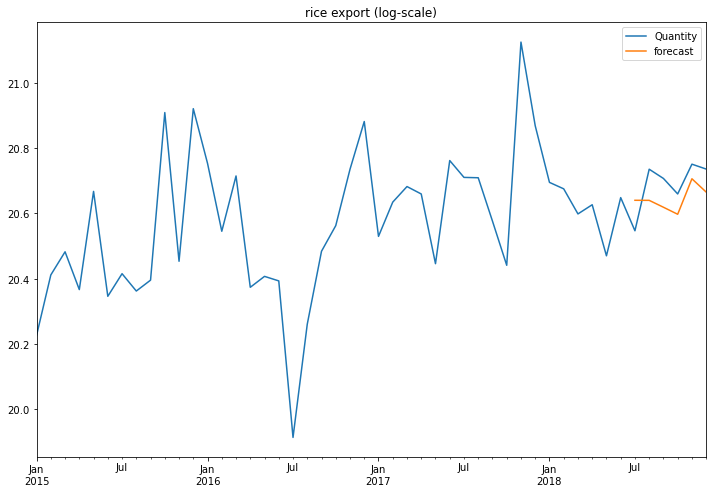

In [731]:
log_lim_rice_export[['Quantity','forecast']].plot(figsize=(12,8))
plt.title('rice export (log-scale)')
plt.show()

# Rolling forecast (Improve model prediction)

In [732]:
from datetime import datetime
from datetime import timedelta
train_end = datetime(2018,7,1)
test_end = datetime(2019,1,1)
train_data = log_lim_rice_export[:train_end].Quantity
test_data = log_lim_rice_export[train_end+ timedelta(days=1):test_end].Quantity

In [735]:
my_order = (0,1,0)
my_seasonal_order = (1,0,0,12)
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = log_lim_rice_export[:train_end-timedelta(days=1)].Quantity
    model = SARIMAX(train_data, order = my_order, seasonal_order = my_seasonal_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

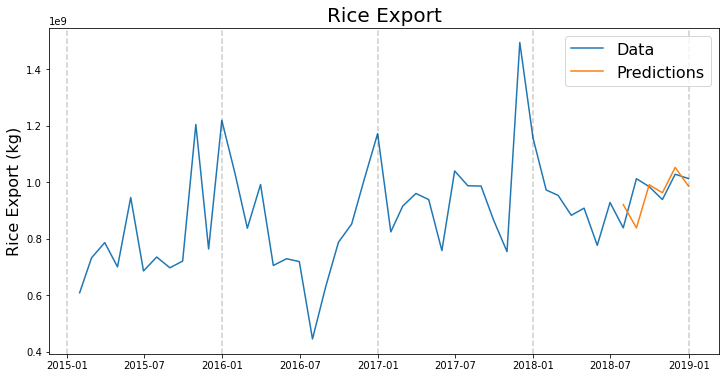

In [734]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,1,1)
plt.figure(figsize=(12,6))
plt.plot(np.exp(log_lim_rice_export.Quantity))
plt.plot(np.exp(rolling_predictions))
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Rice Export', fontsize=20)
plt.ylabel('Rice Export (kg)', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.2)